In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

# Read and View Data

In [2]:
artists = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv')
artists.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White


# Exploratory Data Analysis
## Race

Text(0, 0.5, '')

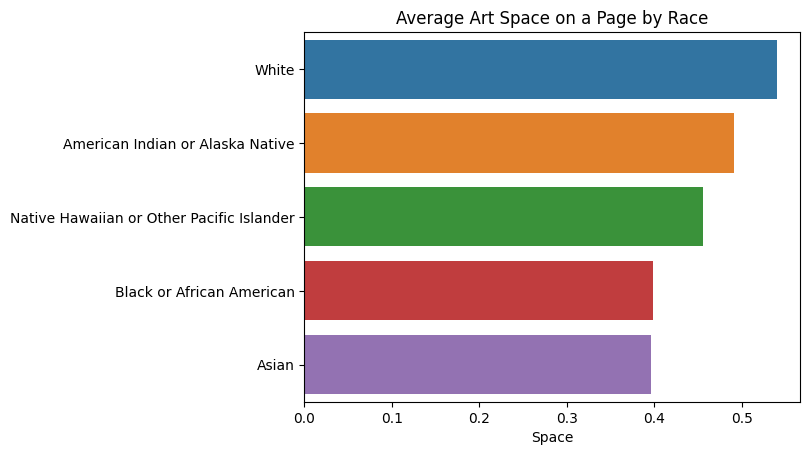

In [3]:
pivoted_space = artists.pivot_table(values= "space_ratio_per_page_total", index = "artist_race").sort_values("space_ratio_per_page_total", ascending = False).reset_index()
sns.barplot(x = "space_ratio_per_page_total", y = "artist_race", data = pivoted_space)
plt.title("Average Art Space on a Page by Race")
plt.xlabel("Space")
plt.ylabel("")

### Most Popular Artist by Race

In [4]:
countdf = artists.dropna().groupby(["artist_race","artist_name"])["artist_name"].count().reset_index(name = "count")
max_countdf = countdf.groupby(["artist_race"]).agg("max").reset_index().sort_values("count", ascending=False)

Text(0.5, 1.0, 'Most Popular Artist by Race')

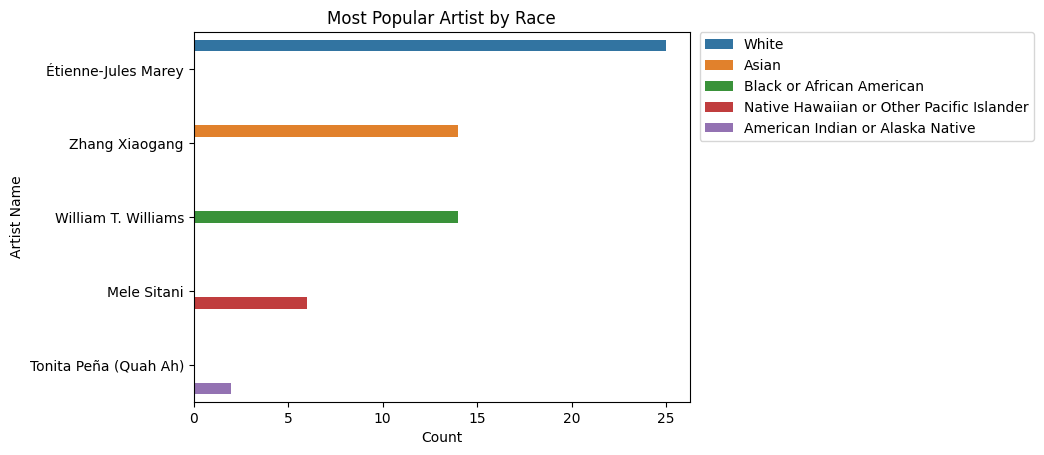

In [5]:
sns.barplot(x = "count", y = "artist_name", hue = "artist_race", data = max_countdf)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Count")
plt.ylabel("Artist Name")
plt.title("Most Popular Artist by Race")

In [6]:
artists.value_counts("artist_nationality").reset_index(name = "count")

,artist_nationality,count
0,American,908
1,French,870
2,British,317
3,German,256
4,Spanish,94
5,Italian,74
6,Russian,62
7,Japanese,56
8,Mexican,52
9,Dutch,50


In [22]:
space_artist = artists.groupby("artist_name")["space_ratio_per_page_total"].mean().sort_values(ascending=False).reset_index().iloc[0:5]

Text(0.5, 1.0, 'Top 5 Artists')

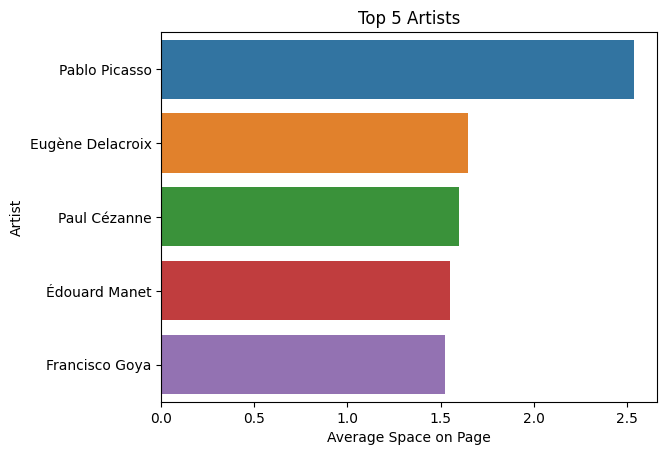

In [24]:
sns.barplot(x = "space_ratio_per_page_total", y = "artist_name", data = space_artist)
plt.xlabel("Average Space on Page")
plt.ylabel("Artist")
plt.title("Top 5 Artists")